# Implementation of Neural Networks to our model

<font color="red"> <b> Contributors </b> </font>

<font color="green"> <b>
- Aman Kumar 
- Aman Gayake 
- Hitasish Debbarma 
 
    </b></font>

# I. Introduction


The objective of this assignment is to implement deep networks using python libraries. I have loaded the classification data, partitioned it based on requiremnets, visualized it, trained it using neural networks and the results are plotted. I have used various network structures with various number of nodes in each hidden layers. The layers are analyzed based on various networks. Tensor flow has been used to train and use the deep neural networks. One more task is to learn much information about Tensorflow library. One more task is to know the information about which network should be used for which particular problem.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 


# Dataset : Adult Data set from UCI repository.

The same dataset that was used for classification in Assignment 0 has been preprocessed and used for examining the various given algorithms.

<b> Data Set Information: </b>

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

  >50K, <=50K.

### Source of the Data :  
Dataset used for classification is Adult Data set from UCI repository.

URL: https://archive.ics.uci.edu/ml/datasets/Adult

Based on the below mentioned attribute, a classification should be done whether the income will exceed $50k/yr or not.

Attributes and its possible values:
- age: continuous(numeric).
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous(numeric).
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous(numeric).
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous(numeric).
- capital-loss: continuous(numeric).
- hours-per-week: continuous(numeric).
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy 


In [ ]:
from IPython.display import Latex
from IPython.display import Math


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']
df = pd.read_csv(url, names=names)

In [4]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Pre Processing of Data###

In [5]:
df.shape

(32561, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'Output'],
      dtype='object')

In [7]:
df.describe()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Missing Values:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
Output           0
dtype: int64

In [9]:
df = df.dropna(how='any') 
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The above statment drops Nan rows. Few values for columns contain value ' ?'. This is a junk data, this data is removed by using below code.

In [10]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.rename(columns={'Output': 'Income'}, inplace=True)
df.head(0)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [ ]:
df = df[(df.workclass != ' ?' ) & (df.education != ' ?') & (df.maritalStatus != ' ?' ) & (df.occupation != ' ?') & (df.relationship != ' ?') & (df.race != ' ?') & (df.sex != ' ?') & (df.nativeCountry != ' ?')]

In [13]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
Income           0
dtype: int64

In [15]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df.head(0)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [17]:
df.shape

(30162, 15)

In [18]:
df['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 30162, dtype: object>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age              30162 non-null int64
workclass        30162 non-null object
fnlwgt           30162 non-null int64
education        30162 non-null object
educationNum     30162 non-null int64
maritalStatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
sex              30162 non-null object
capitalGain      30162 non-null int64
capitalLoss      30162 non-null int64
hoursPerWeek     30162 non-null int64
nativeCountry    30162 non-null object
Income           30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [21]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maritalStatus'] = le.fit_transform(df['maritalStatus'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['nativeCountry'] = le.fit_transform(df['nativeCountry'])
df['Income'] = le.fit_transform(df['Income'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [22]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [23]:
df['nativeCountry'].unique()

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

### Data Visualizaion###

In [ ]:
import seaborn as sns

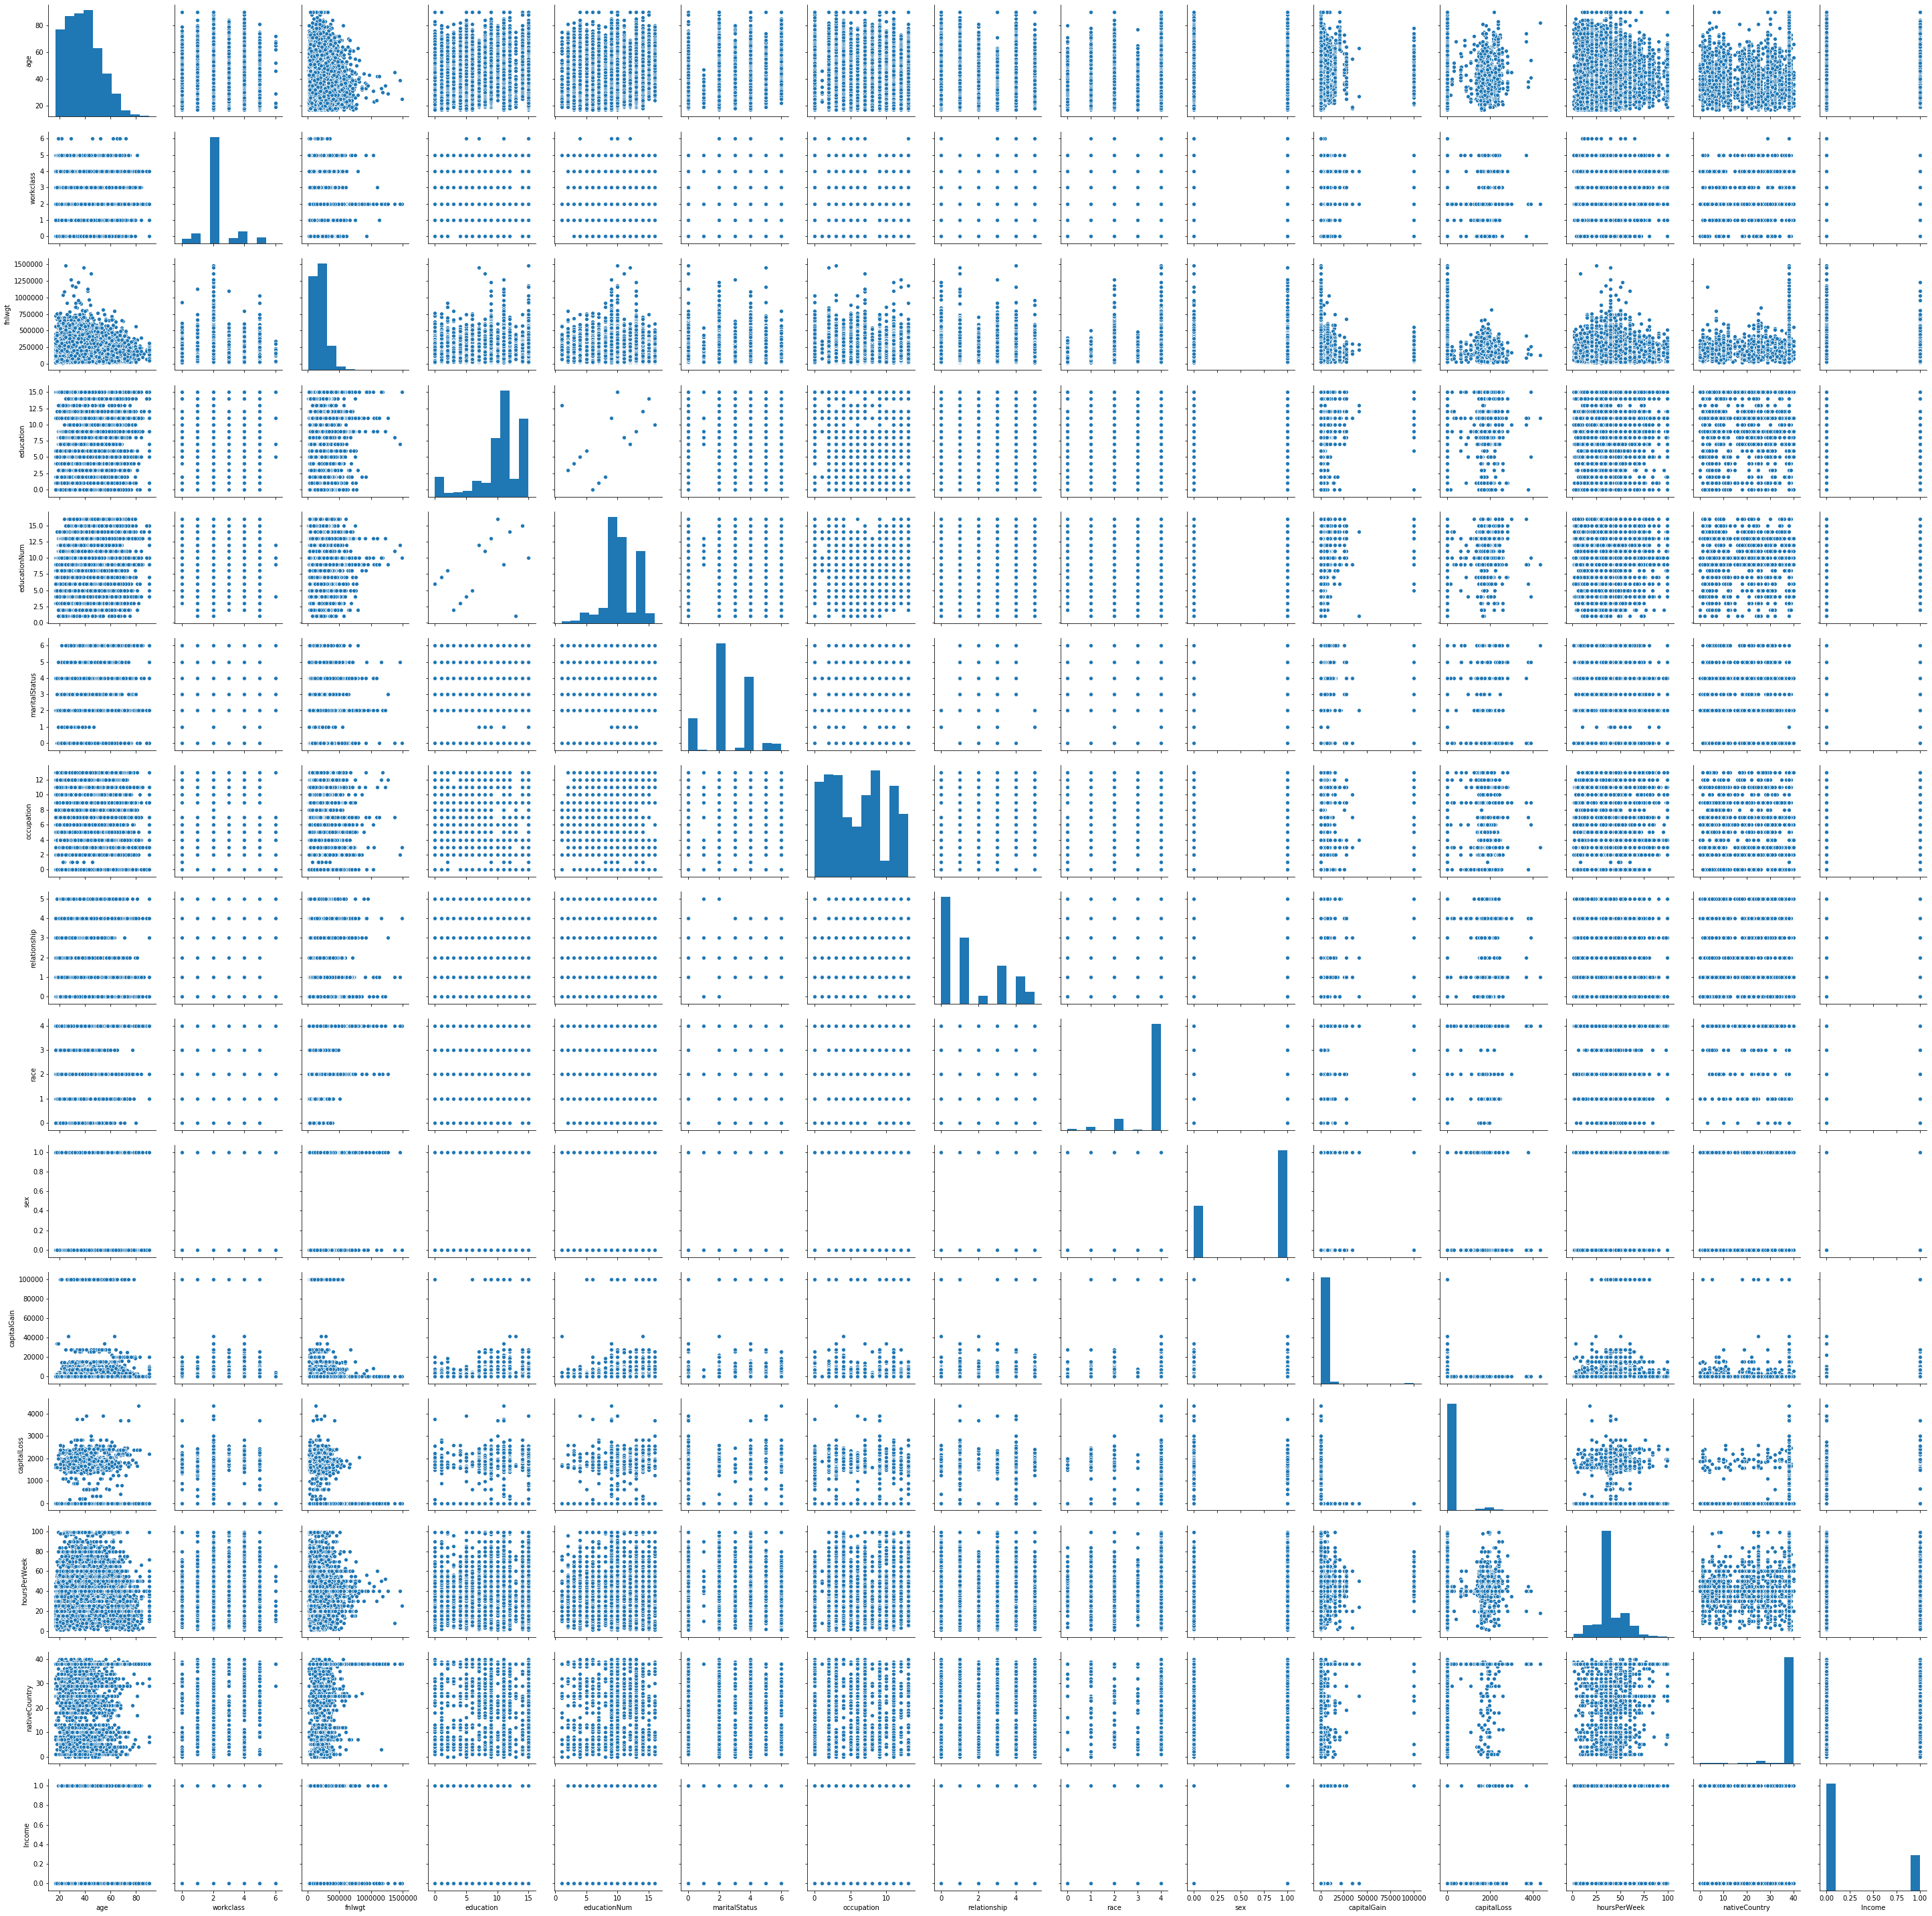

In [25]:
g = sns.pairplot(df)
g.fig.set_size_inches(40,40)

<Figure size 1440x720 with 0 Axes>

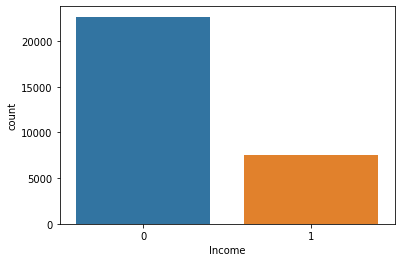

<Figure size 1440x720 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
sns.countplot(x="Income", data=df)
plt.figure(figsize=(20,10))


##### The proportion of records having income less than 50K dollars is more than the proportion of records having more than 50k dollars.#####

In [27]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


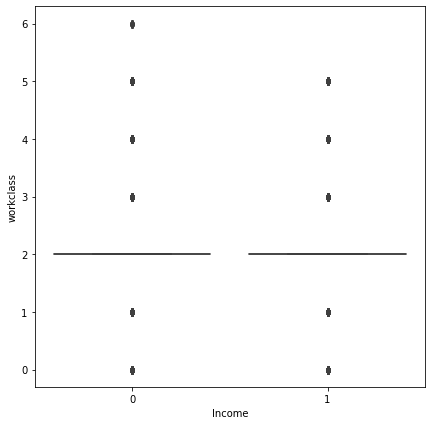

In [28]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="workclass",x='Income', data=df)

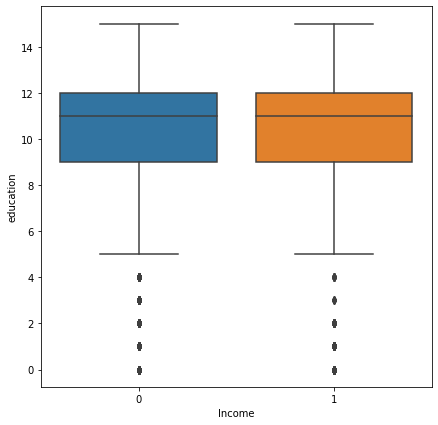

In [29]:

plt.figure(figsize=(7,7))
ax = sns.boxplot(y="education",x='Income', data=df)

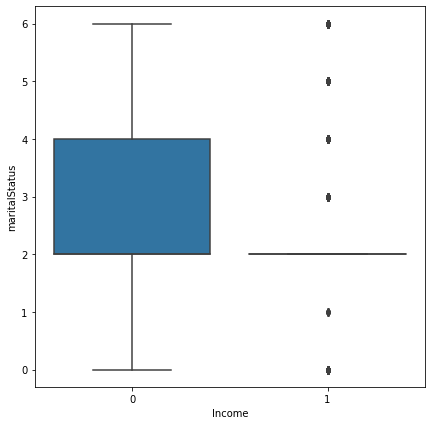

In [30]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y="maritalStatus",x='Income', data=df)

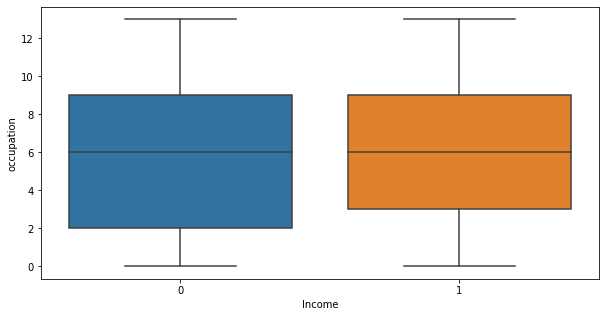

In [31]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="occupation",x='Income', data=df)

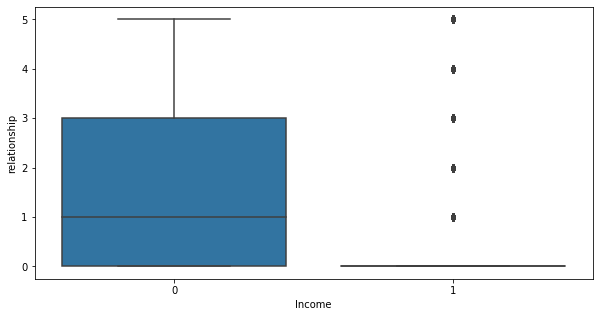

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

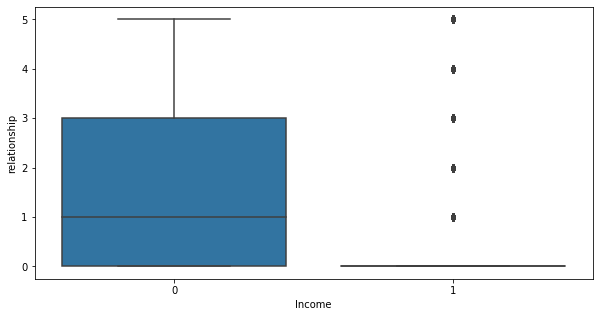

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

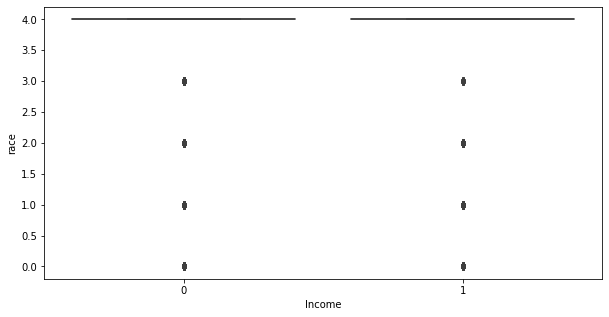

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='Income', data=df)

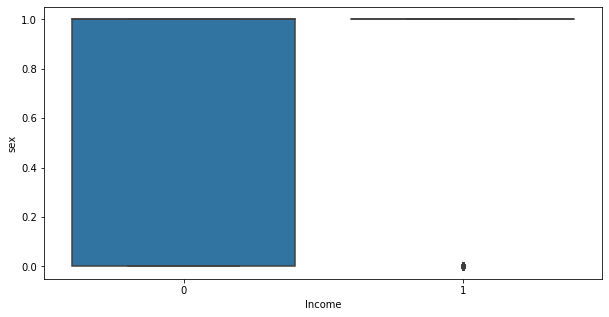

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='Income', data=df)

In [36]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


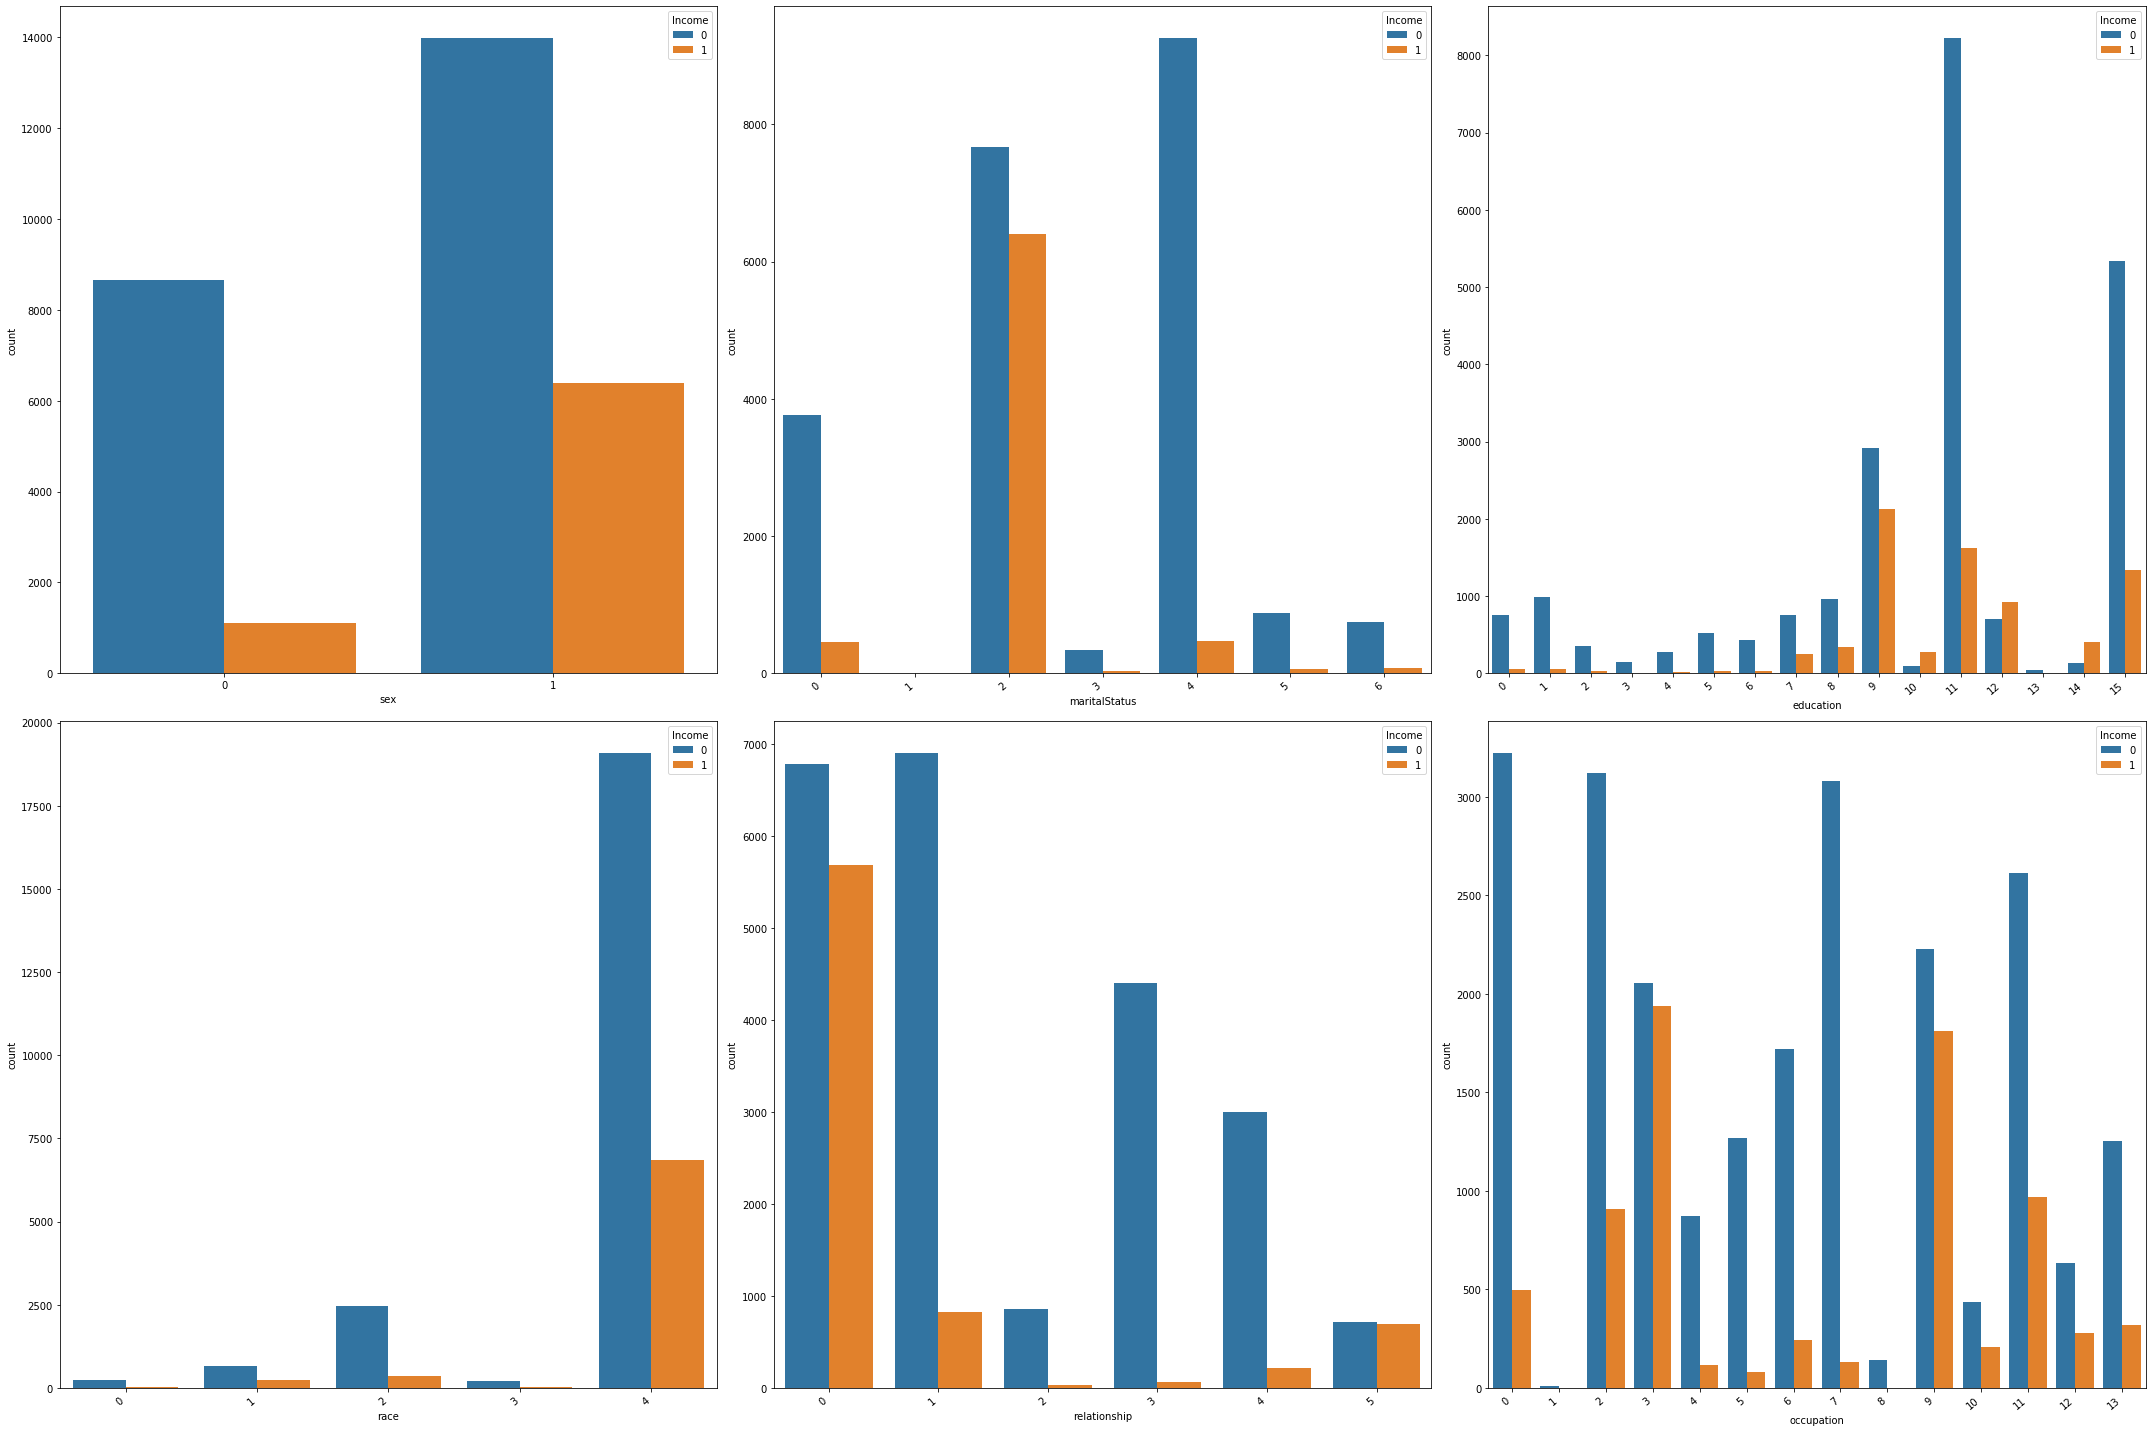

In [37]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=df,hue="Income",ax = ax[0][0])
cp = sns.countplot(x="maritalStatus", data=df,hue="Income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=df,hue="Income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df,hue="Income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df,hue="Income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df,hue="Income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

age                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
workclass         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
fnlwgt            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
education         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
maritalStatus       AxesSubplot(0.125,0.518913;0.168478x0.16413)
occupation       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
relationship     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
race             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
sex                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
capitalGain      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
capitalLoss      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
hoursPerWeek     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
nativeCountry          AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

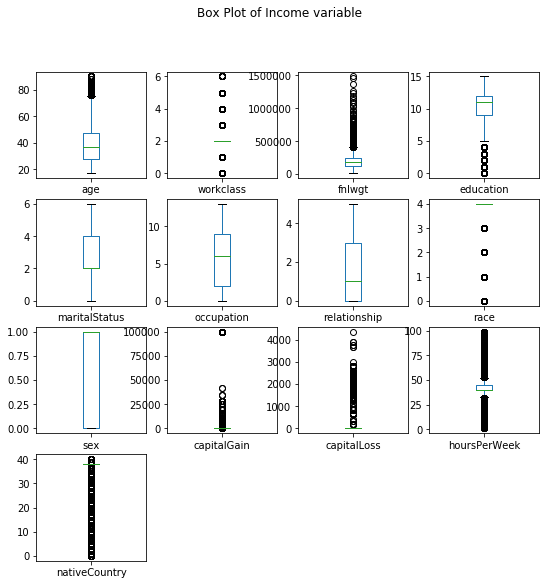

In [38]:
df.drop(['educationNum','Income'],axis = 1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of Income variable')

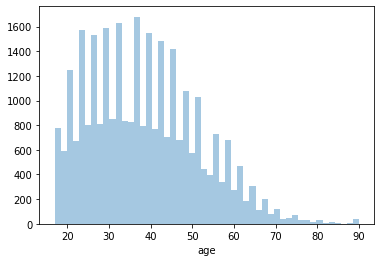

In [39]:
sns.distplot(df['age'],kde = False,bins = 50)

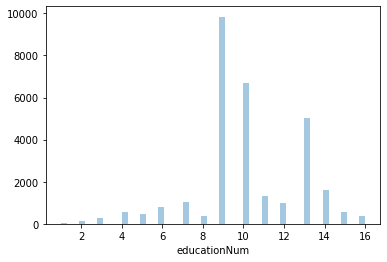

In [40]:
sns.distplot(df['educationNum'],kde = False)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


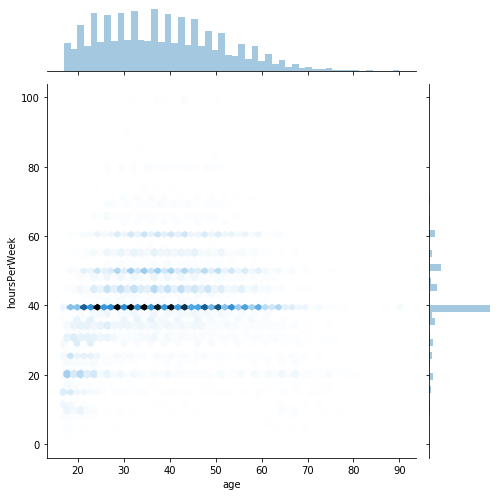

In [41]:
sns.jointplot(x ="age", y="hoursPerWeek", data=df,kind="hex",size = 7)
#sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

#### The hours.per week value of most of the people is 40  

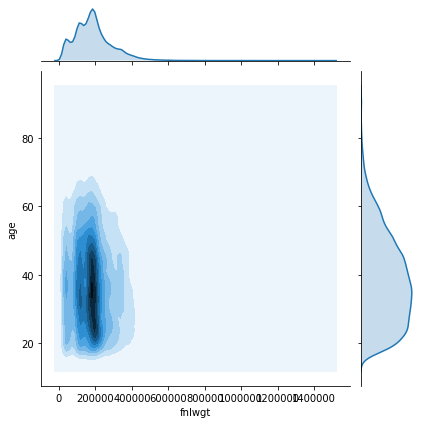

In [42]:
sns.jointplot(x="fnlwgt", y="age", data=df, kind="kde")

The fnlwgt values are moslty in the range of 0-40,000 and are of age 20 to 40

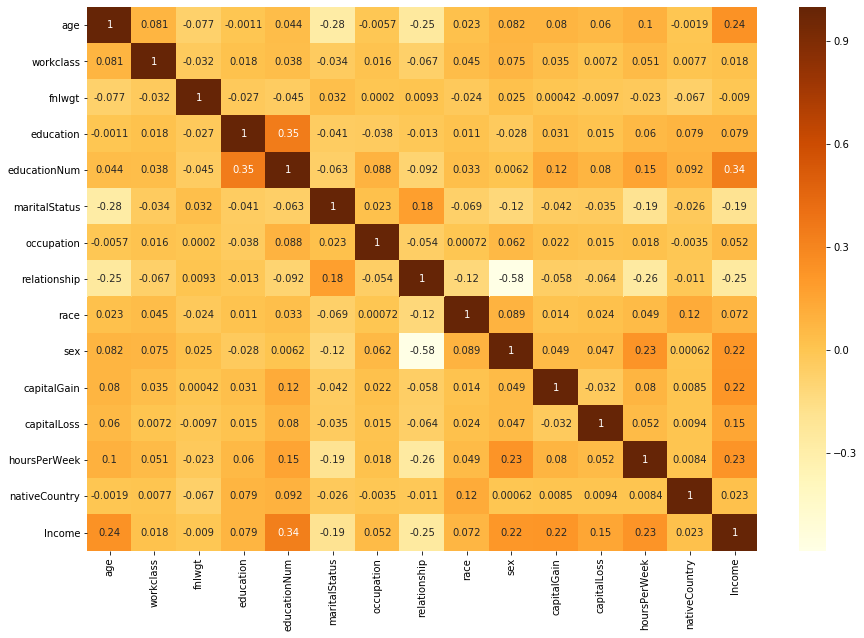

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')


In [44]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [45]:
#From the above correlation matrix remove the unneccesary column which have least significant correlation with the target varaible "Income
df1 = df.drop(['fnlwgt','education', 'capitalLoss','nativeCountry'],axis=1)
df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


In [46]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


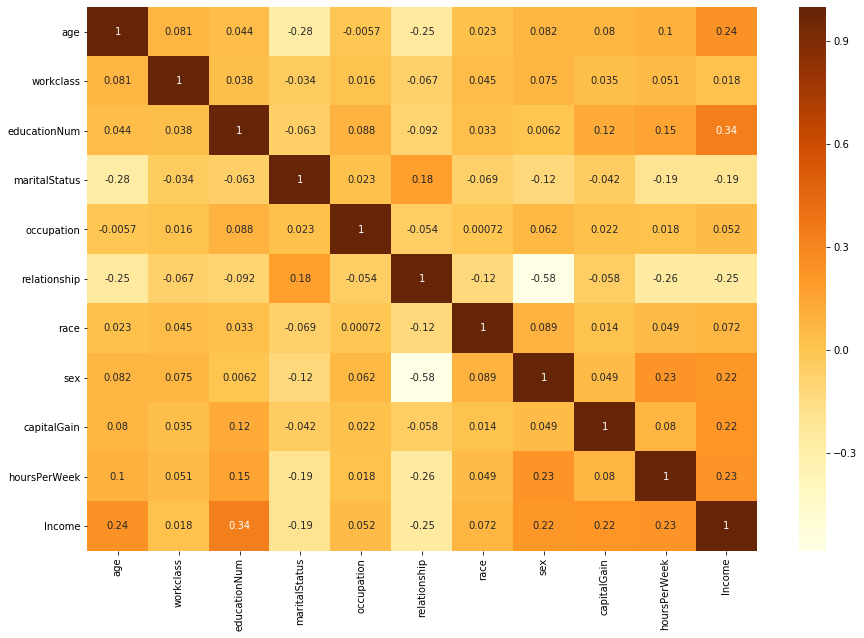

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap = 'YlOrBr')

In [48]:
df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


### Preliminary Observations


1. The no of records having income less than 50k dollars is more than the no of records having income more than 50k dollars income. The dataset neeeds to be balanced with the target values so that the models do not overfit the data.
2. The capital.gain and capital.loss values contain zeroes ,so these columns can be dropped.<br/>
3. Scatter plots and bar plots are plotted to find the distribution of various values of categorical values.
4. Hours.per.week has a value of 40 in most of the records, so this field can be dropped.
5. The fnlwgt values are moslty in the range of 0-40,000 and are of age 20 to 40.
6. The outliers are present in some of the contiuous variables which need to the handled properly.


<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />

**Deep Feedforward networks** or also known multilayer perceptrons are the foundation of most deep learning models. Networks like CNNs and RNNs are just some special cases of Feedforward networks. 

These networks are mostly used for supervised machine learning tasks where we already know the target function ie the result we want our network to achieve and are extremely important for practicing machine learning and form the basis of many commercial applications, areas such as computer vision and NLP were greatly affected by the presence of these networks.

The main goal of a feedforward network is to approximate some function f*. For example, a regression function y = f *(x) maps an input x to a value y. A feedforward network defines a mapping y = f (x; θ) and learns the value of the parameters θ that result in the best function approximation.

The reason these networks are called feedforward is that the flow of information takes place in the forward direction, as x is used to calculate some intermediate function in the hidden layer which in turn is used to calculate y. 

In this, if we add feedback from the last hidden layer to the first hidden layer it would represent a recurrent neural network.
These networks are represented by a composition of many different functions. Each model is associated with an acyclic graph describing how the functions are composed together. For example, we might have three functions f (1), f (2), and f (3) connected in a chain, to form f (x) = f(3)(f (2)(f (1)(x))). 

In this f(1) is the first layer, f(2) is the second layer and f(3) is the output layer.



### Network1

In the first network, there are 4 hidden layers. The number of nodes in each layer are te same by each layer from input to output. The first, second, third, and fourth hidden layers consists of 10, 10, 10, 10, units respectively. One of the reason for choosing such network is because of the higher number of features when compared to output classes. Here, the input features are gradually generalized and each consecutive layer comes up with fewer units. At the end, we will end up with output layer with 1 units. The activation fucntion used in the hiddden layers are 'relu' and the activation fucntion used in the output layer is Sigmoid fucntion

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [102]:
Y = df1['Income']
df1['Income'].value_counts()

0    22654
1     7508
Name: Income, dtype: int64

In [ ]:
X = df1.drop(['Income'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [60]:
X_train.shape

(21113, 10)

In [61]:
X_test.shape

(9049, 10)

In [62]:
Y_test.shape

(9049,)

In [63]:
Y_train.shape

(21113,)

In [66]:
Y_test= np.array(Y_test).reshape(-1,1)
Y_test.shape

(9049, 1)

In [67]:
Y_train= np.array(Y_train).reshape(-1,1)
Y_train.shape

(21113, 1)

In [ ]:
from keras.layers import InputLayer

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.

model.add is used to add a layer to our neural network. We need to specify as an argument what type of layer we want. The Dense is used to specify the fully connected layer. 

The arguments of Dense are output dimension which is 10 in the first case, input dimension which is 20 for input dimension and the activation function to be used which is relu in this case. 
The second layer, third and fourth layer are similar, 

In the fifth layer(output layer) the output dimension is 1(number of classes). Now as we have discussed earlier, the output layer takes different activation functions and for the case of multiclass classification, it is softmax.

Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [161]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)               

In [162]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
21113/21113 [==============================] - 1s 47us/step - loss: 1.8953 - acc: 0.6596
Epoch 2/10
21113/21113 [==============================] - 0s 14us/step - loss: 1.4976 - acc: 0.7093
Epoch 3/10
21113/21113 [==============================] - 0s 15us/step - loss: 1.3454 - acc: 0.7088
Epoch 4/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.2496 - acc: 0.7242
Epoch 5/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.1804 - acc: 0.7392
Epoch 6/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.1624 - acc: 0.7436
Epoch 7/10
21113/21113 [==============================] - 0s 14us/step - loss: 1.0950 - acc: 0.7552
Epoch 8/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.1134 - acc: 0.7547
Epoch 9/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.0898 - acc: 0.7572
Epoch 10/10
21113/21113 [==============================] - 0s 13us/step - loss: 1.0912 - acc: 0.7585

Here we specify the input data-> X_train, labels-> Y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.
Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [204]:
cm

array([[4987, 1812],
       [1161, 1089]])

In [ ]:
from sklearn.metrics import f1_score

In [206]:
f1_score(Y_test, y_pred)

0.4228305183459522

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [208]:
precision_score(Y_test, y_pred)

0.375387797311272

In [209]:
recall_score(Y_test, y_pred)

0.484

Model 2: **FEED FORWARD HIDDEN LAYER Neural Network**

### Network2

In the first network, there is only 1 hidden layer. The number of nodes in each layer are the same by each layer from input to output. The first 10 units respectively.  The activation fucntion used in the hiddden layers are 'relu' and the activation fucntion used in the output layer is Sigmoid fucntion

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [262]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [263]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)

Epoch 1/10
21113/21113 [==============================] - 1s 51us/step - loss: 1.8108 - acc: 0.6715
Epoch 2/10
21113/21113 [==============================] - 0s 10us/step - loss: 1.5658 - acc: 0.6869
Epoch 3/10
21113/21113 [==============================] - 0s 9us/step - loss: 1.3816 - acc: 0.6988
Epoch 4/10
21113/21113 [==============================] - 0s 10us/step - loss: 1.2480 - acc: 0.7023
Epoch 5/10
21113/21113 [==============================] - 0s 10us/step - loss: 1.1398 - acc: 0.7173
Epoch 6/10
21113/21113 [==============================] - 0s 10us/step - loss: 1.0874 - acc: 0.7159
Epoch 7/10
21113/21113 [==============================] - 0s 9us/step - loss: 1.0372 - acc: 0.7201
Epoch 8/10
21113/21113 [==============================] - 0s 10us/step - loss: 0.9937 - acc: 0.7292
Epoch 9/10
21113/21113 [==============================] - 0s 10us/step - loss: 0.9644 - acc: 0.7385
Epoch 10/10
21113/21113 [==============================] - 0s 11us/step - loss: 0.9494 - acc: 0.7438


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [266]:
cm

array([[5080, 1719],
       [ 944, 1306]])

In [ ]:
from sklearn.metrics import f1_score

In [268]:
f1_score(Y_test, y_pred)

0.49516587677725116

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [270]:
precision_score(Y_test, y_pred)

0.4317355371900826

In [271]:
recall_score(Y_test, y_pred)

0.5804444444444444